In [2]:
import pylab
import datetime
import time
import numpy as np
import math
import skimage.draw
import matplotlib.animation as anim
from IPython.display import clear_output

In [3]:
clock = np.zeros((225, 225))

In [14]:
def circle(size, clock=None):
    if clock is not None:
        tempclock = clock
    else:
        tempclock = np.zeros((200, 200))
    ys = len(tempclock)//2
    xs = len(tempclock[0])//2
    for i in range(360):
        x = (int)(xs + size/2*(math.cos(math.pi/180*i)))
        y = (int)(ys + size/2*(math.sin(math.pi/180*i)))
        tempclock[x, y] = 4
    return tempclock
def print_time():
    a = datetime.datetime.today()
    if a.minute < 10:
        m = "0" + str(a.minute)
    else:
        m = str(a.minute)
    if a.second < 10:
        s = "0" + str(a.second)
    else:
        s = str(a.second)
    print(str(a.hour) + ":" + m + ":" + s)

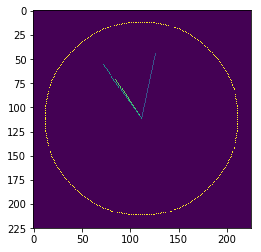

10:54:02


KeyboardInterrupt: 

In [17]:
while True:
    clock = np.zeros((225, 225))
    circle(200, clock)
    hand(200, 50, 3, clock)
    hand(200, 70, 2, clock)
    hand(200, 70, 1, clock)
    m = pylab.imshow(clock)
    pylab.show()
    print_time()
    time.sleep(1)
    clear_output()

In [5]:
def hand(size, percent, ID, clock):
    ys = len(clock)//2
    xs = len(clock[0])//2
    now = datetime.datetime.today()
    if ID == 3:
        a = (now.hour%12+now.minute/60+now.second/3600) * 30
    elif ID == 2:
        a = (now.minute+now.second/60) * 6
    else:
        a = now.second * 6
    angle = (a - 90) * math.pi / 180
    r, c = skimage.draw.line(ys, xs, ys+(int)((size*percent/200)*math.sin(angle)), xs+(int)((size*percent/200)*math.cos(angle)))
    clock[r, c] = ID
    return clock